In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# define dataset
df = pd.read_csv('mnist_dataset.csv')
df.sample(frac = 1) # shuffle
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# get the data labels
labels = df.loc[:, 'label']
labels = np.array(labels)

hot_encoded_labels = []
for label in labels:
    temp = np.zeros(10)
    temp[label] = 1
    hot_encoded_labels.append(temp)
    
labels = np.array(hot_encoded_labels)
labels.shape

(42000, 10)

In [11]:
# drop the data labels
df = df.drop('label', axis=1)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# scale data
data = np.array(df)

scaler = MinMaxScaler()
X = scaler.fit_transform(data)
X.shape

(42000, 784)

In [13]:
X_train = X[:33600]
Y_train = labels[:33600]

X_test = X[-8400:]
Y_test = labels[-8400:]

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(33600, 784)
(33600, 10)
(8400, 784)
(8400, 10)


In [16]:
import nnet

def get_accuracy(Y, Y_hat):
    return np.sum(np.argmax(Y, 0) == np.argmax(Y_hat, 0)) / Y.shape[1]

model = nnet.Sequential([
    nnet.layers.Dense((784, 12), nnet.activation.ReLu),
    nnet.layers.Dense((12, 10), nnet.activation.ReLu),
    nnet.layers.Dense((10, 10), nnet.activation.Softmax)
])

# train the model
model.fit(X_train, Y_train, 120, nnet.loss.CategoricalCrossEntropy, nnet.optimizers.Adam(), accuracy_metric=get_accuracy, X_val=X_test, Y_val=Y_test)

Epoch: 1 Loss: 97621.24799313987 Validation Loss: 24391.94313252021 Accuracy: 0.11782738095238095
Epoch: 2 Loss: 92881.82289246762 Validation Loss: 23226.126812779145 Accuracy: 0.11979166666666667
Epoch: 3 Loss: 89011.50486665661 Validation Loss: 22274.829839099693 Accuracy: 0.1255952380952381
Epoch: 4 Loss: 85986.79228528871 Validation Loss: 21524.855145408088 Accuracy: 0.12895833333333334
Epoch: 5 Loss: 83683.05260249236 Validation Loss: 20947.52898320549 Accuracy: 0.12997023809523808
Epoch: 6 Loss: 81965.96684968032 Validation Loss: 20520.20247912609 Accuracy: 0.1293154761904762
Epoch: 7 Loss: 80712.78390204885 Validation Loss: 20212.36712615718 Accuracy: 0.12422619047619048
Epoch: 8 Loss: 79798.70777284616 Validation Loss: 19989.70184350658 Accuracy: 0.1149702380952381
Epoch: 9 Loss: 79108.22415204423 Validation Loss: 19821.461873788834 Accuracy: 0.10952380952380952
Epoch: 10 Loss: 78551.4226199989 Validation Loss: 19684.638921894235 Accuracy: 0.10625
Epoch: 11 Loss: 78070.06796564

In [17]:
# train the model further
model.fit(X_train, Y_train, 120, nnet.loss.CategoricalCrossEntropy, nnet.optimizers.Adam(), accuracy_metric=get_accuracy, X_val=X_test, Y_val=Y_test)

Epoch: 1 Loss: 32582.57939967073 Validation Loss: 8229.984400100942 Accuracy: 0.7355357142857143
Epoch: 2 Loss: 32073.024669010192 Validation Loss: 8108.636722179564 Accuracy: 0.7410119047619048
Epoch: 3 Loss: 31572.7757903398 Validation Loss: 7977.7097649753505 Accuracy: 0.7440476190476191
Epoch: 4 Loss: 31140.43068444128 Validation Loss: 7874.713047066452 Accuracy: 0.7477380952380952
Epoch: 5 Loss: 30788.27072077187 Validation Loss: 7778.531701503663 Accuracy: 0.7508630952380952
Epoch: 6 Loss: 30379.64232540094 Validation Loss: 7674.915984803658 Accuracy: 0.7545238095238095
Epoch: 7 Loss: 29967.89241857934 Validation Loss: 7578.404836627498 Accuracy: 0.7578571428571429
Epoch: 8 Loss: 29618.749043792686 Validation Loss: 7496.494472317515 Accuracy: 0.7605952380952381
Epoch: 9 Loss: 29321.639670140317 Validation Loss: 7421.510823115927 Accuracy: 0.7636309523809524
Epoch: 10 Loss: 29039.354632587925 Validation Loss: 7346.641978534506 Accuracy: 0.7660119047619047
Epoch: 11 Loss: 28730.951

In [18]:
model.fit(X_train, Y_train, 50, nnet.loss.CategoricalCrossEntropy, nnet.optimizers.Adam(), accuracy_metric=get_accuracy, X_val=X_test, Y_val=Y_test)

Epoch: 1 Loss: 13259.629587228108 Validation Loss: 3791.8361742947054 Accuracy: 0.8905059523809524
Epoch: 2 Loss: 15969.187703217794 Validation Loss: 4438.795405736417 Accuracy: 0.8633928571428572
Epoch: 3 Loss: 13433.634430518341 Validation Loss: 3845.665068452053 Accuracy: 0.8875892857142857
Epoch: 4 Loss: 13946.545459399284 Validation Loss: 3891.149145509445 Accuracy: 0.8827380952380952
Epoch: 5 Loss: 14317.930369616892 Validation Loss: 3983.980495280608 Accuracy: 0.8784821428571429
Epoch: 6 Loss: 13825.470385090277 Validation Loss: 3896.4221493605587 Accuracy: 0.8824107142857143
Epoch: 7 Loss: 13408.032806769359 Validation Loss: 3809.480143337198 Accuracy: 0.8872321428571428
Epoch: 8 Loss: 13484.097610439829 Validation Loss: 3825.3976447967802 Accuracy: 0.8866964285714286
Epoch: 9 Loss: 13780.02374309291 Validation Loss: 3890.439470439508 Accuracy: 0.8835416666666667
Epoch: 10 Loss: 13788.198924434646 Validation Loss: 3896.4377370933653 Accuracy: 0.8838988095238095
Epoch: 11 Loss: 

In [19]:
# get test accuracy
get_accuracy(Y_test.T, model.predict(X_test))

0.8785714285714286

In [20]:
# test model
import matplotlib.pyplot as plt

def test_prediction(index: int):
    current = np.array([X_test[index]])
    
    y_pred = model.predict(current)
    print('Prediction', np.argmax(y_pred, 0)[0])
    print('Label', np.argmax(Y_test[index]))
    
    current_image = current.T.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction 7
Label 7


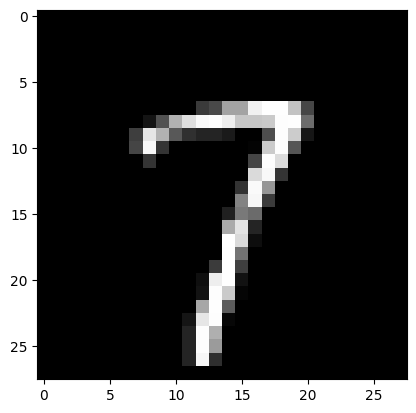

In [21]:
test_prediction(2)

Prediction 9
Label 9


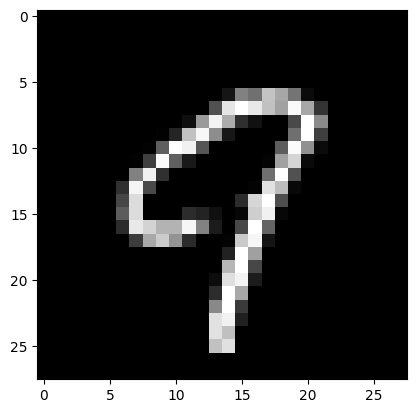

In [22]:
test_prediction(122)

Prediction 3
Label 3


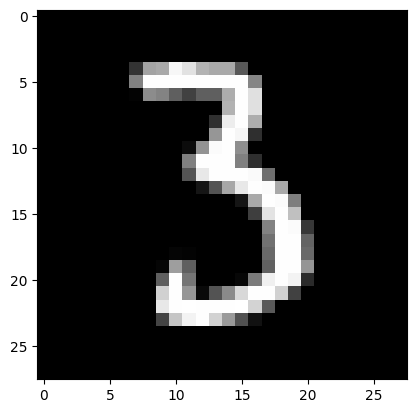

In [23]:
test_prediction(54)

Prediction 6
Label 6


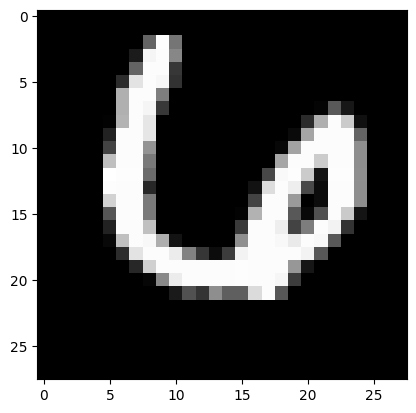

In [24]:
test_prediction(61)

Prediction 8
Label 8


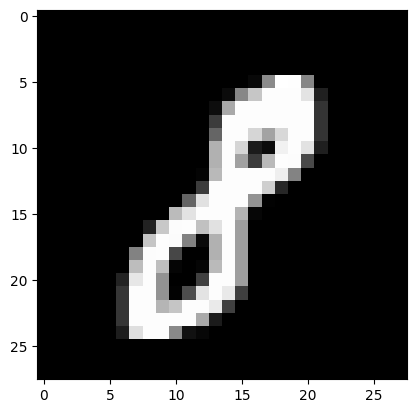

In [25]:
test_prediction(39)

Prediction 5
Label 5


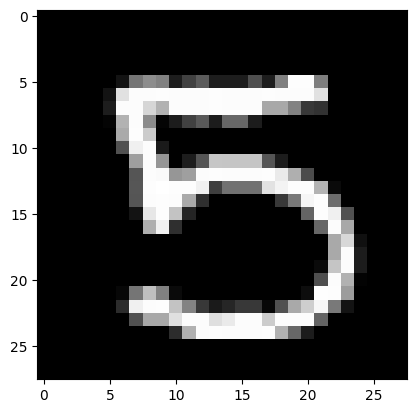

In [26]:
test_prediction(9)